In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [151]:
data = pd.read_csv("/Users/jamie/Desktop/Projects/housing.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are missing variables

In [152]:
data= data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [153]:

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [154]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

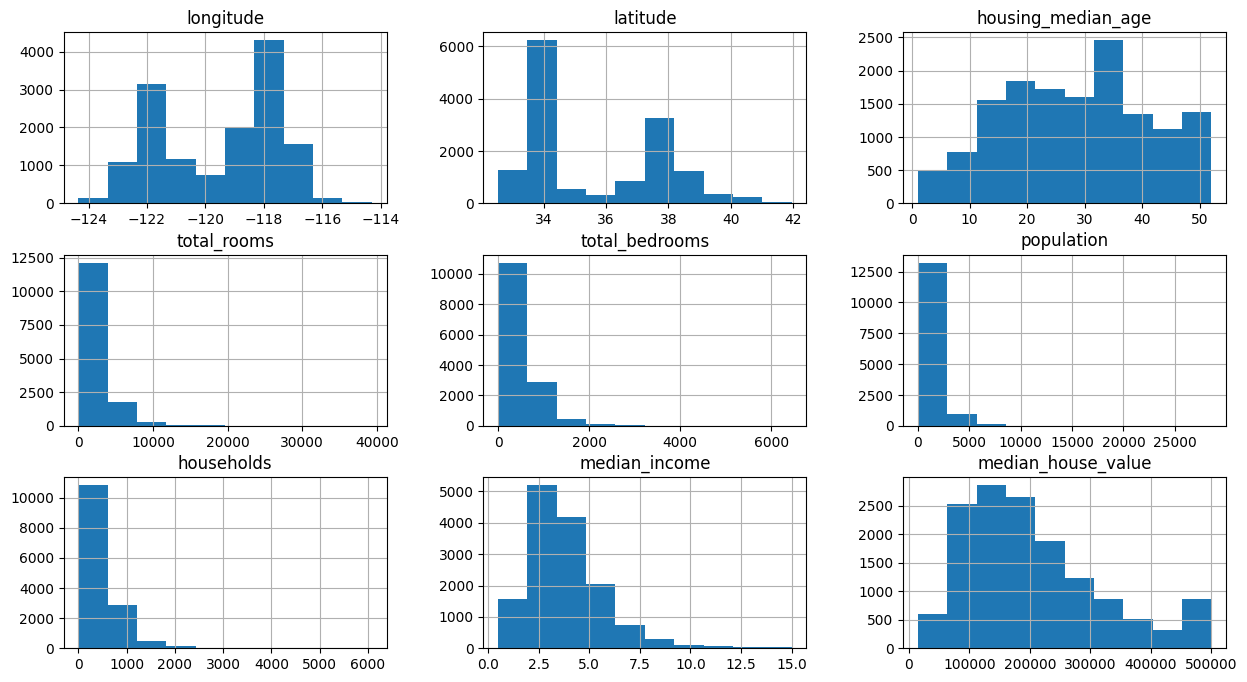

In [155]:
train_data.hist(figsize = (15,8))

In [156]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     6242
INLAND        4543
NEAR OCEAN    1905
NEAR BAY      1611
ISLAND           2
Name: count, dtype: int64

In [157]:
pd.get_dummies(train_data.ocean_proximity)
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'], drop_first=True))
train_data = train_data.drop(['ocean_proximity'], axis=1)
train_data= train_data.astype(int)


<Axes: >

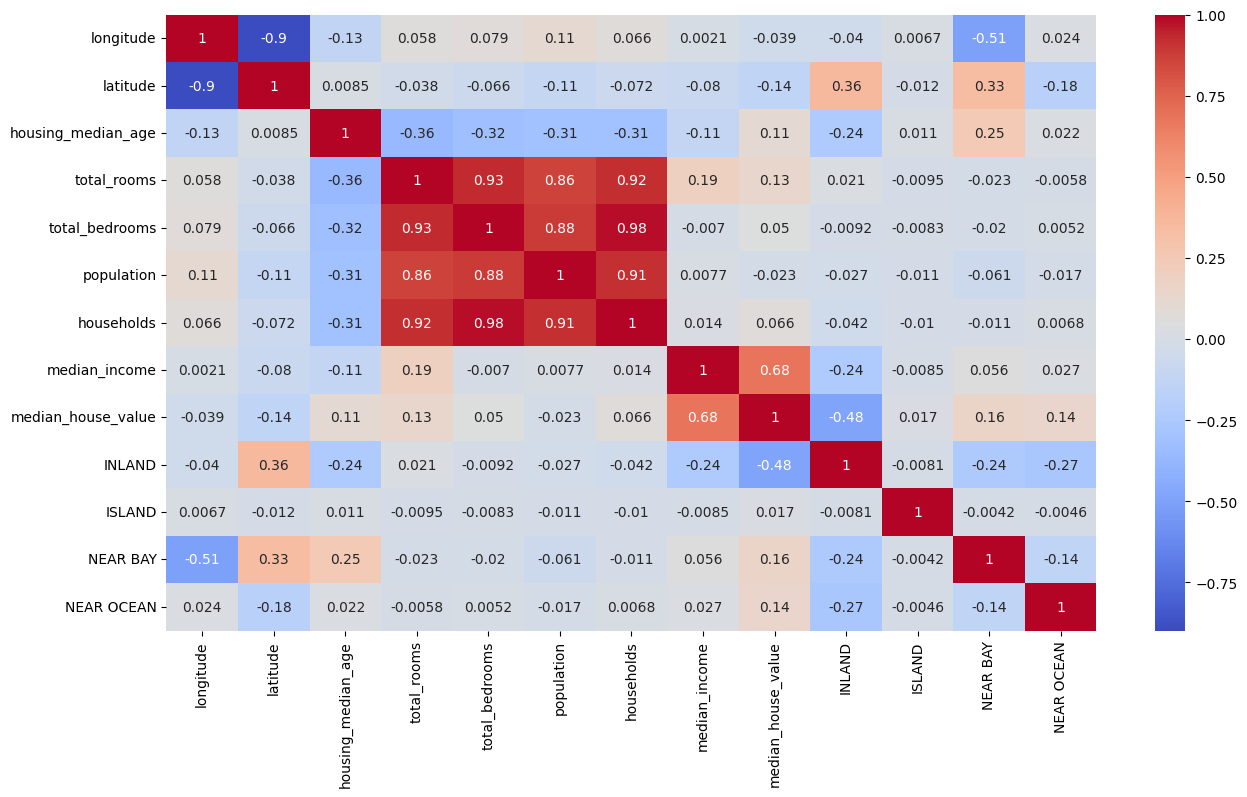

In [159]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

1: perfect positive correlation, -1: perfect negative correlation, 0: no correlation

InLand:  strong negative correlation with median_house_value => inland properties tend to ha e lower house values.

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = train_data.drop(['median_house_value'], axis=1) 
y = train_data['median_house_value']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 4991477463.9962845
R^2 Score: 0.6308013125188365
                      Coefficient
longitude            -7881.888260
latitude             -6269.104426
housing_median_age    1123.290864
total_rooms             -3.939541
total_bedrooms          63.191833
population             -39.876758
households              81.933120
median_income        38163.256309
INLAND              -63626.363595
ISLAND              176618.627650
NEAR BAY             -3119.032831
NEAR OCEAN            9656.502947
